In [14]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt

#https://www.countyhealthrankings.org/health-data/texas/data-and-resources
#https://healthdata.dshs.texas.gov/dashboard/mental-health/mental-health#data-source


In [15]:
left = pd.read_excel('/Users/antoantony/Library/CloudStorage/OneDrive-TheUniversityofTexasatAustin/Python/VS_Code/Data Analysis/Disparities Dashboard/MentalHealthCoverage/2025_county_health_rankings_texas_data_-_v1.xlsx', sheet_name="Select Measure Data")

left = left[['State', 'County','Average Number of Mentally Unhealthy Days','# Mental Health Providers', 'Mental Health Provider Rate', 
      'Mental Health Provider Ratio', '# Primary Care Physicians', 'Primary Care Physicians Rate', 
       'Primary Care Physicians Ratio', '# Uninsured', '% Uninsured' ]]
right = pd.read_excel('/Users/antoantony/Library/CloudStorage/OneDrive-TheUniversityofTexasatAustin/Python/VS_Code/Data Analysis/Disparities Dashboard/MentalHealthCoverage/2025_county_health_rankings_texas_data_-_v1.xlsx', sheet_name='Additional Measure Data')
right = right[['State', 'County','% Frequent Mental Distress', 'Suicide Rate (Age-Adjusted)', 'Other Primary Care Provider Ratio',
           'Population']]
finaldata = pd.merge(left=left, right=right, how='inner', on=['State', 'County'])
finaldata

,State,County,Average Number of Mentally Unhealthy Days,# Mental Health Providers,Mental Health Provider Rate,Mental Health Provider Ratio,# Primary Care Physicians,Primary Care Physicians Rate,Primary Care Physicians Ratio,# Uninsured,% Uninsured,% Frequent Mental Distress,Suicide Rate (Age-Adjusted),Other Primary Care Provider Ratio,Population
0,Texas,NaN,5.130877,51742.0,169.62754,590:1,17818.0,60.34285,1657:1,4760829,18.780374,16.2,13.798586,871:1,30503301
1,Texas,Anderson,5.747067,36.0,62.35278,1604:1,22.0,37.66994,2655:1,6314,17.659563,18.4,32.822980,1283:1,57736
2,Texas,Andrews,5.654674,3.0,16.07372,6221:1,9.0,48.80694,2049:1,3747,22.871269,18.9,15.595604,1333:1,18664
3,Texas,Angelina,6.074380,144.0,164.91256,606:1,57.0,65.89138,1518:1,13772,19.635296,21.2,16.764159,766:1,87319
4,Texas,Aransas,5.835400,24.0,94.58501,1057:1,8.0,32.63974,3064:1,3643,20.601708,20.1,36.054092,1692:1,25374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Texas,Wood,5.924809,28.0,58.42950,1711:1,15.0,32.69755,3058:1,6464,19.822748,19.0,19.120030,1331:1,47921
251,Texas,Yoakum,5.757049,3.0,40.17140,2489:1,2.0,26.29157,3804:1,1733,26.645141,20.1,NaN,1245:1,7468
252,Texas,Young,5.856503,15.0,82.76319,1208:1,15.0,83.43995,1198:1,2993,21.134021,20.3,23.525579,1295:1,18124
253,Texas,Zapata,5.916112,NaN,NaN,NaN,NaN,NaN,NaN,2778,23.676809,21.4,14.489852,2289:1,13736


Merge data with demographics dataset

In [16]:
# read in demographics dataset
demographics = pd.read_csv('/Users/antoantony/Library/CloudStorage/OneDrive-TheUniversityofTexasatAustin/Python/VS_Code/Data Analysis/Disparities Dashboard/demographics.csv')
dem_final = demographics.copy()
# remove the 'county' in each county name 
dem_final['COUNTYNAME'] = dem_final['COUNTYNAME'].str.replace('County', '', case=False).str.strip()

#merge mentalhealth data with demographics 
merged_dem_data = pd.merge(left=finaldata, right=dem_final, left_on='County', right_on='COUNTYNAME', how='left')
merged_dem_data.drop(columns='Unnamed: 0', inplace=True)

# replace with a binary categorical value for later graphing
def create(input):
    if pd.isna(input):
        return 'Low % Minority'
    else:
        return 'High % Minority'
merged_dem_data['High or Low % Minority'] = merged_dem_data['COUNTYNAME'].apply(create)

mh_and_demographic = merged_dem_data.copy()
mh_and_demographic

,State,County,Average Number of Mentally Unhealthy Days,# Mental Health Providers,Mental Health Provider Rate,Mental Health Provider Ratio,# Primary Care Physicians,Primary Care Physicians Rate,Primary Care Physicians Ratio,# Uninsured,% Uninsured,% Frequent Mental Distress,Suicide Rate (Age-Adjusted),Other Primary Care Provider Ratio,Population,COUNTYNAME,High or Low % Minority
0,Texas,NaN,5.130877,51742.0,169.62754,590:1,17818.0,60.34285,1657:1,4760829,18.780374,16.2,13.798586,871:1,30503301,NaN,Low % Minority
1,Texas,Anderson,5.747067,36.0,62.35278,1604:1,22.0,37.66994,2655:1,6314,17.659563,18.4,32.822980,1283:1,57736,Anderson,High % Minority
2,Texas,Andrews,5.654674,3.0,16.07372,6221:1,9.0,48.80694,2049:1,3747,22.871269,18.9,15.595604,1333:1,18664,NaN,Low % Minority
3,Texas,Angelina,6.074380,144.0,164.91256,606:1,57.0,65.89138,1518:1,13772,19.635296,21.2,16.764159,766:1,87319,Angelina,High % Minority
4,Texas,Aransas,5.835400,24.0,94.58501,1057:1,8.0,32.63974,3064:1,3643,20.601708,20.1,36.054092,1692:1,25374,NaN,Low % Minority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Texas,Wood,5.924809,28.0,58.42950,1711:1,15.0,32.69755,3058:1,6464,19.822748,19.0,19.120030,1331:1,47921,NaN,Low % Minority
251,Texas,Yoakum,5.757049,3.0,40.17140,2489:1,2.0,26.29157,3804:1,1733,26.645141,20.1,NaN,1245:1,7468,Yoakum,High % Minority
252,Texas,Young,5.856503,15.0,82.76319,1208:1,15.0,83.43995,1198:1,2993,21.134021,20.3,23.525579,1295:1,18124,NaN,Low % Minority
253,Texas,Zapata,5.916112,NaN,NaN,NaN,NaN,NaN,NaN,2778,23.676809,21.4,14.489852,2289:1,13736,NaN,Low % Minority


Show the mental health provider ratio for each county (combine with demographics dataset if possible)

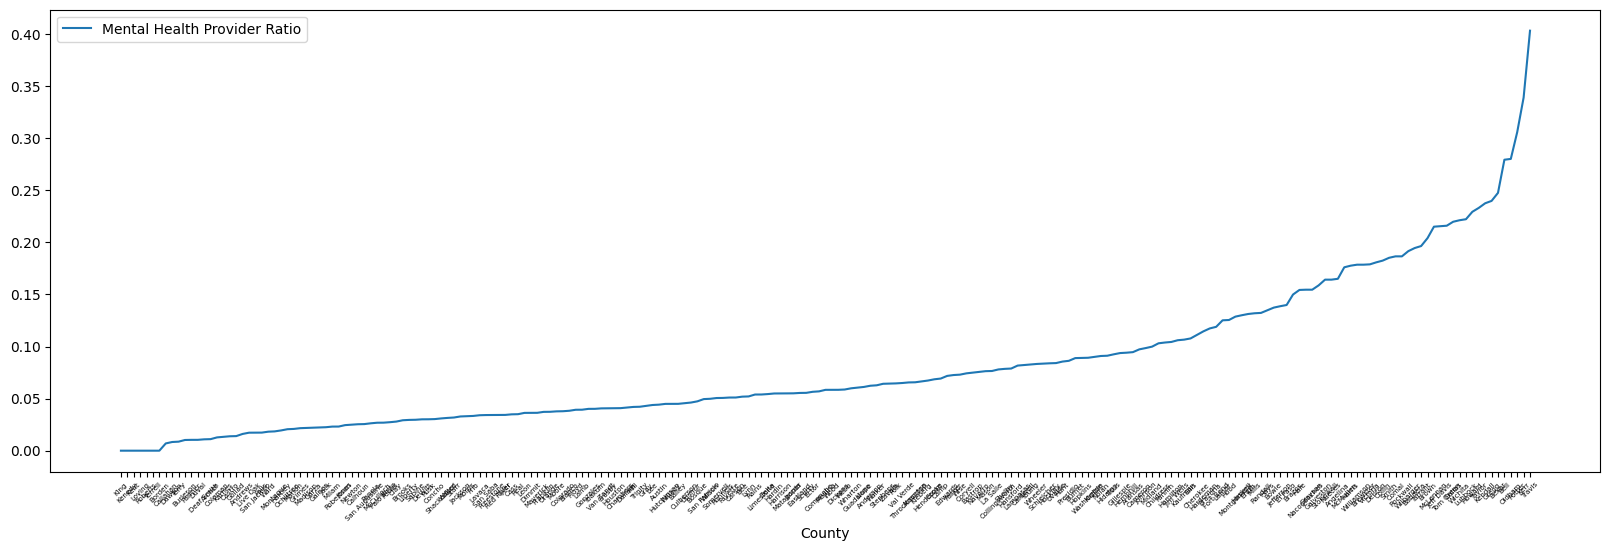

In [26]:
#function to turn ratios into decimals 
def ratio(input):
    left, right = input.split(':')
    left = left.replace(',','')
    right = right.replace(',','')
    return round((float(right)/float(left) * 100),7)

#take a copy 
mh_ratio_cleaned = mh_and_demographic.copy()

#clean up the Ratio column and remove any rows that contain NaN's in that column 
mh_ratio_cleaned = mh_ratio_cleaned.dropna(subset=['Mental Health Provider Ratio']).copy()
mh_ratio_cleaned['Mental Health Provider Ratio'] = mh_ratio_cleaned['Mental Health Provider Ratio'].astype(dtype=str)
mh_ratio_cleaned['Mental Health Provider Ratio'] = mh_ratio_cleaned['Mental Health Provider Ratio'].apply(ratio)


mh_ratio_cleaned = mh_ratio_cleaned[['County', 'Mental Health Provider Ratio', 'High or Low % Minority']] #Select relevant columns 
mh_ratio_cleaned.dropna(inplace=True) #remove rows with NaN's 
mh_ratio_cleaned.reset_index(drop=True, inplace=True) #reset the index 
mh_ratio_cleaned.set_index('County', inplace=True)
mh_ratio_cleaned.sort_values(by='Mental Health Provider Ratio', inplace=True)
mh_ratio_cleaned.plot(y='Mental Health Provider Ratio', figsize=(20,6))
plt.xticks(ticks=range(len(mh_ratio_cleaned.index)), labels=mh_ratio_cleaned.index, rotation=45, fontsize=5)
plt.show()

In [18]:
import plotly.express as px

fig = px.bar(
    mh_ratio_cleaned.reset_index(),
    x='County',
    y='Mental Health Provider Ratio',
    color='High or Low % Minority',
    title='Mental Health Provider Ratio by County',
    height=600
)

fig.update_layout(xaxis_tickangle=90)
fig.show()

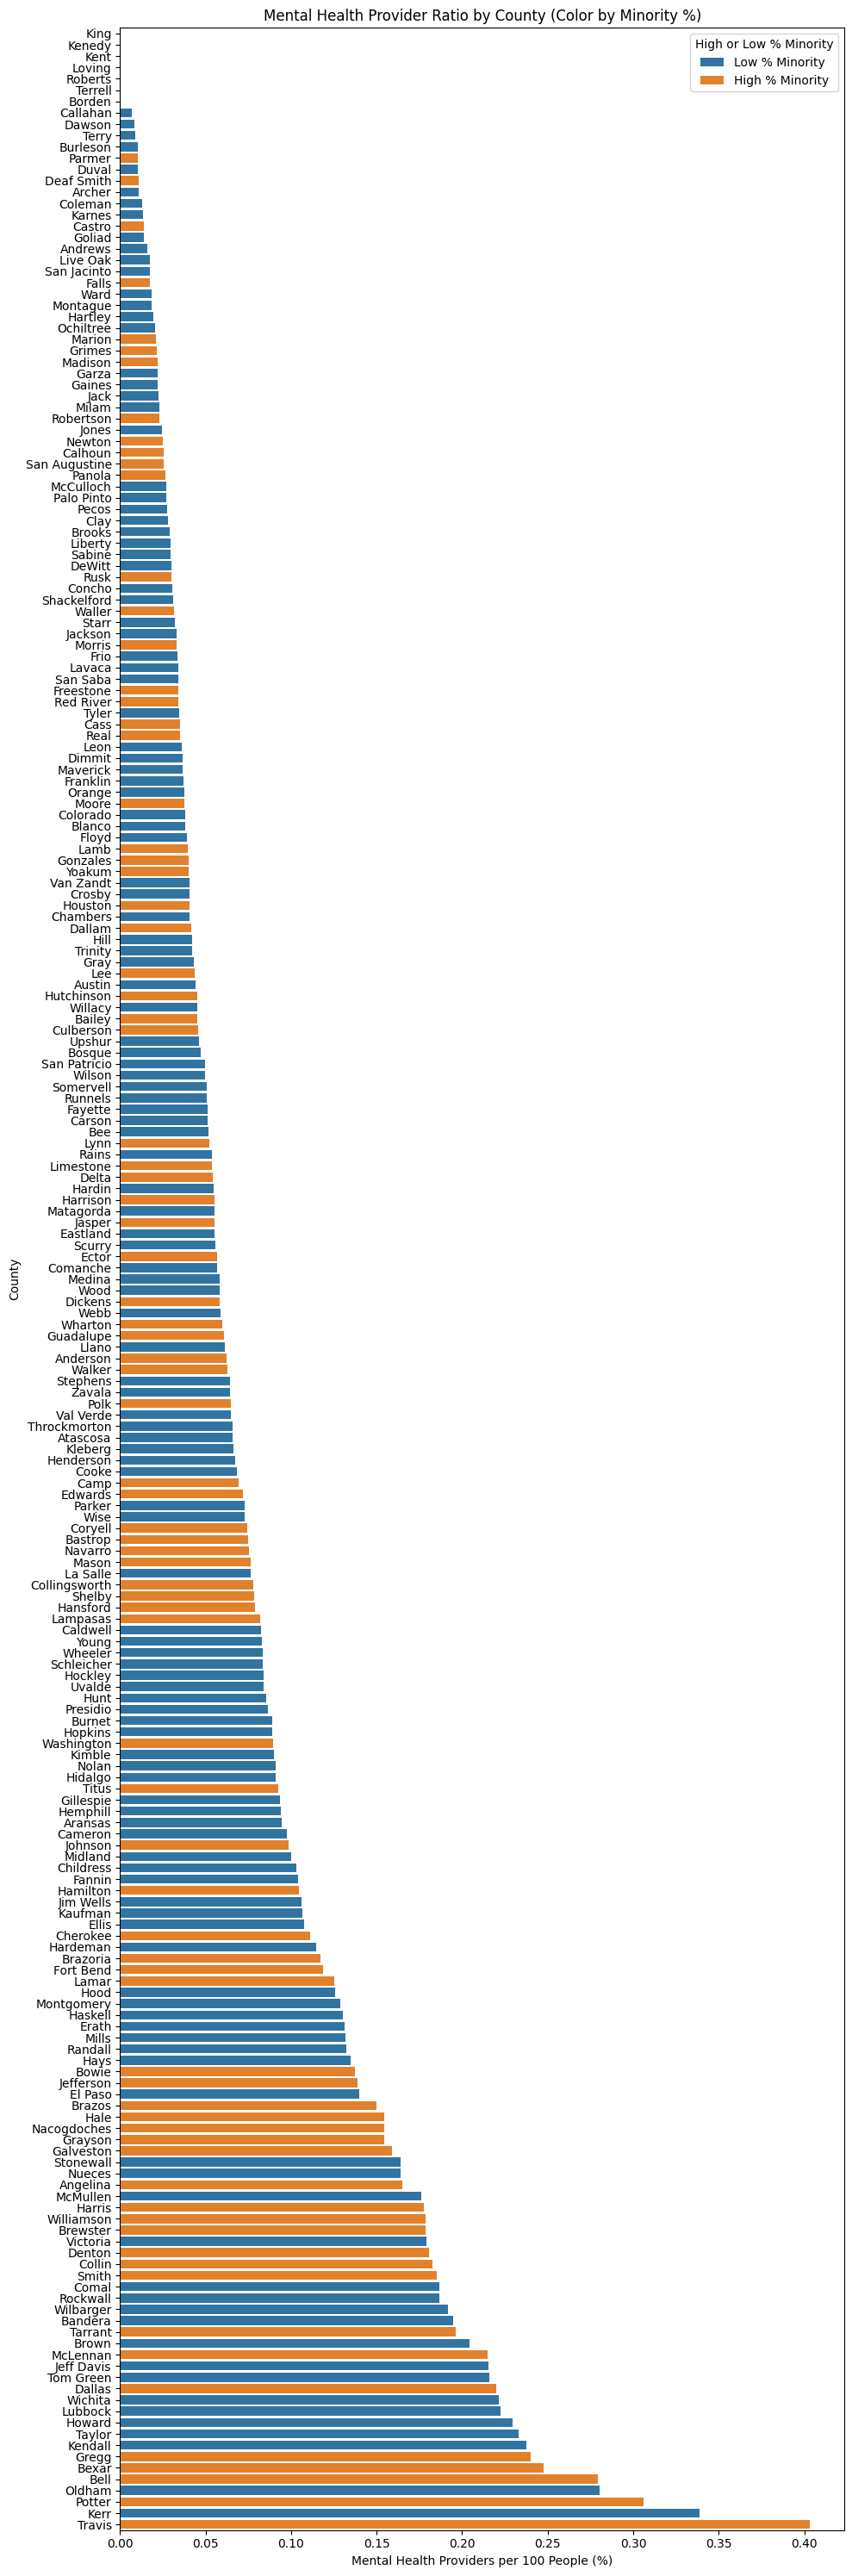

In [19]:
import seaborn as sns

# Add a column with numeric ratios for plotting
mh_ratio_cleaned['Ratio'] = mh_ratio_cleaned['Mental Health Provider Ratio']

# Use seaborn for better aesthetics
plt.figure(figsize=(10, 30))
sns.barplot(
    data=mh_ratio_cleaned.reset_index(),
    y='County',
    x='Ratio',
    hue='High or Low % Minority',
    dodge=False
)

plt.title('Mental Health Provider Ratio by County (Color by Minority %)')
plt.xlabel('Mental Health Providers per 100 People (%)')
plt.ylabel('County')
plt.tight_layout()
plt.show()


Show the suicide rate for each county (combine with demographics dataset)

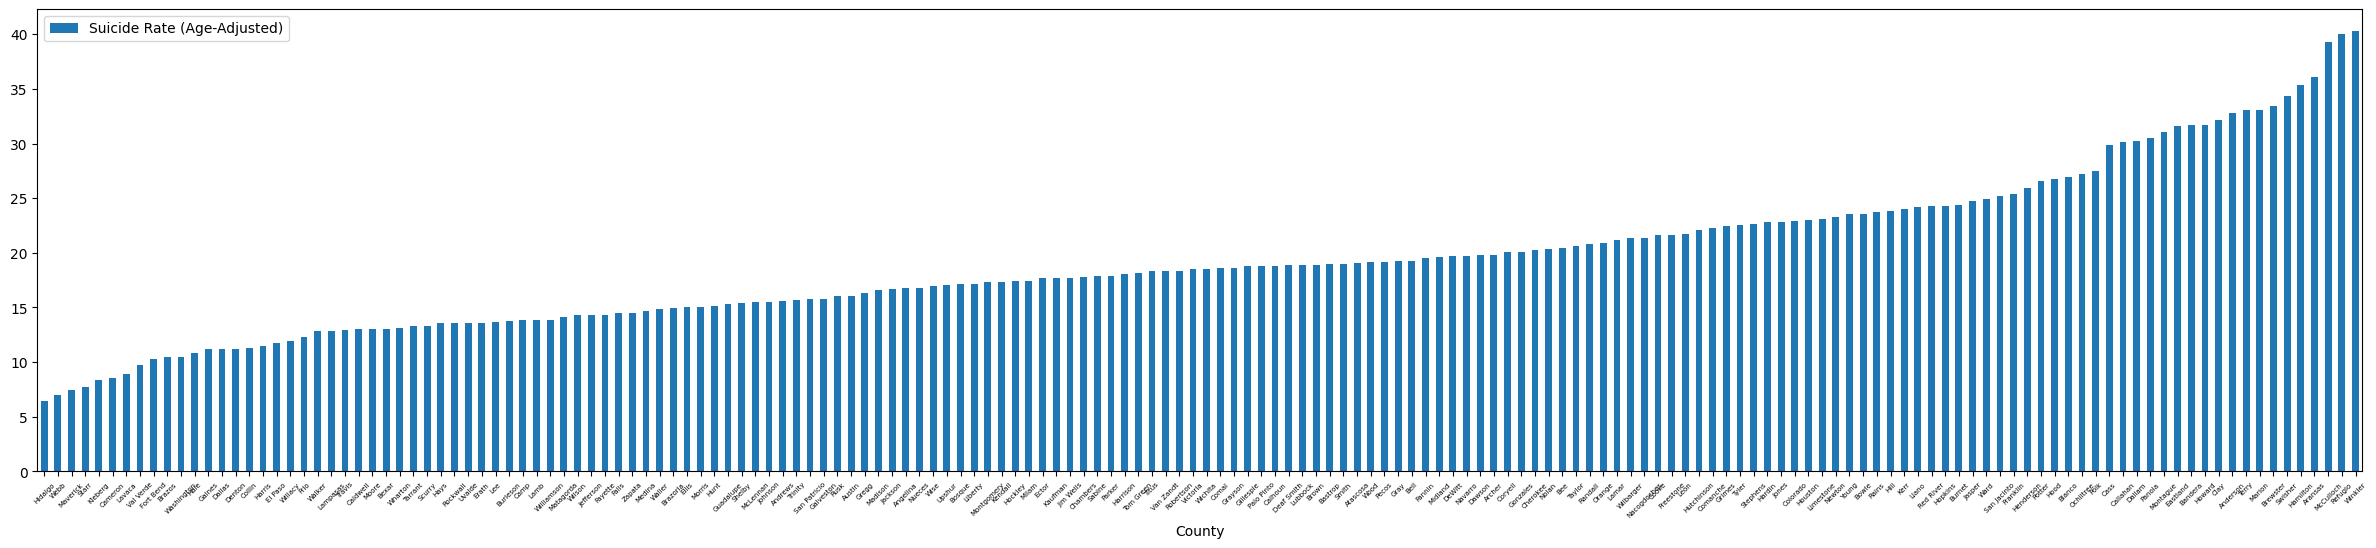

In [20]:
mh_suicide_rate = mh_and_demographic[['County', 'Suicide Rate (Age-Adjusted)', 'High or Low % Minority']]
mh_suicide_rate = mh_suicide_rate.dropna().copy()
mh_suicide_rate.sort_values(by='Suicide Rate (Age-Adjusted)', inplace=True)
mh_suicide_rate = mh_suicide_rate[mh_suicide_rate['Suicide Rate (Age-Adjusted)'] != 0]
mh_suicide_rate.set_index('County', inplace=True)
mh_suicide_rate.plot(y='Suicide Rate (Age-Adjusted)', kind='bar', figsize=(30,6))
plt.xticks(rotation=45, fontsize=5)
plt.show()

In [21]:
import plotly.express as px

fig = px.bar(
    mh_suicide_rate.reset_index(),
    x='County',
    y='Suicide Rate (Age-Adjusted)',
    color='High or Low % Minority',
    title='Suicide Rate by County',
    height=600
)

fig.update_layout(xaxis_tickangle=90)
fig.show()

Show mental distress rate with respect to each county (combine with demographics dataset)

In [22]:
mh_mental_distress = mh_and_demographic[['County', '% Frequent Mental Distress', 'High or Low % Minority']]
mh_mental_distress = mh_mental_distress.dropna().copy()

import plotly.express as px

fig = px.bar(
    mh_mental_distress.reset_index(),
    x='County',
    y='% Frequent Mental Distress',
    color='High or Low % Minority',
    title='Suicide Rate by County',
    height=600
)

fig.update_layout(xaxis_tickangle=90)
fig.show()

The following dataset consists of locational data regarding where mental health clinicians work and at what capacity. 

In [23]:
therapists_data = pd.read_csv('/Users/antoantony/Library/CloudStorage/OneDrive-TheUniversityofTexasatAustin/Python/VS_Code/Data Analysis/Disparities Dashboard/MentalHealthCoverage/Clinician_Region.csv')
therapists_data

,County,Public Health Region,La Paz Border Designation,Urban Rural Designation,2015 Population,2016 Population,2017 Population,2018 Population,2019 Population,2020 Population,...,Psychiatrist 2015,Psychiatrist 2016,Psychiatrist 2017,Psychiatrist 2018,Psychiatrist 2019,Psychiatrist 2020,Psychiatrist 2021,Psychiatrist 2022,Psychiatrist 2023,Psychiatrist 2024
0,Anderson,PHR 4/5N,Non-Border,Rural,58408,58382,58342,58293,58248,58199,...,3,3,5,4,4,4,4,4,3,3
1,Andrews,PHR 9/10,Non-Border,Rural,17952,18708,19526,20388,21305,22269,...,0,0,0,0,0,0,0,0,0,0
2,Angelina,PHR 4/5N,Non-Border,Rural,88868,89219,89557,89860,90151,90437,...,3,5,6,10,11,12,14,18,15,14
3,Aransas,PHR 11,Non-Border,Urban,25302,25763,26228,26700,27198,27699,...,1,1,1,1,1,1,1,1,2,1
4,Archer,PHR 2/3,Non-Border,Urban,8657,8582,8516,8452,8393,8344,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood,PHR 4/5N,Non-Border,Rural,43677,44009,44331,44666,44993,45292,...,0,0,0,0,0,0,0,0,0,0
250,Yoakum,PHR 1,Non-Border,Rural,8449,8599,8752,8899,9060,9225,...,0,0,0,0,0,0,0,0,0,0
251,Young,PHR 2/3,Non-Border,Rural,18571,18603,18640,18667,18695,18712,...,0,0,0,0,0,0,0,0,0,0
252,Zapata,PHR 11,Border,Rural,14282,14327,14353,14377,14403,14409,...,0,0,0,0,0,0,0,0,0,0


The ultimate goal would be to show a map. It shows with or without high % minorities. 
Then, it would also graph high v low amounts of therapists/psychiatrists per county 

In [24]:
#clean and merge the two datasets
therapists_data['County'] = therapists_data['County'].str.replace('County', '', case=False).str.strip()
therapist_merged = pd.merge(left=therapists_data, right=dem_final, left_on='County', right_on='COUNTYNAME',
         how='left')
therapist_merged.drop(columns='Unnamed: 0', inplace=True)

#Create new column that makes a binary categorical variable
therapist_merged['High or Low % Minority'] = therapist_merged['COUNTYNAME'].apply(create)
therapist_merged.head()

,County,Public Health Region,La Paz Border Designation,Urban Rural Designation,2015 Population,2016 Population,2017 Population,2018 Population,2019 Population,2020 Population,...,Psychiatrist 2017,Psychiatrist 2018,Psychiatrist 2019,Psychiatrist 2020,Psychiatrist 2021,Psychiatrist 2022,Psychiatrist 2023,Psychiatrist 2024,COUNTYNAME,High or Low % Minority
0,Anderson,PHR 4/5N,Non-Border,Rural,58408,58382,58342,58293,58248,58199,...,5,4,4,4,4,4,3,3,Anderson,High % Minority
1,Andrews,PHR 9/10,Non-Border,Rural,17952,18708,19526,20388,21305,22269,...,0,0,0,0,0,0,0,0,NaN,Low % Minority
2,Angelina,PHR 4/5N,Non-Border,Rural,88868,89219,89557,89860,90151,90437,...,6,10,11,12,14,18,15,14,Angelina,High % Minority
3,Aransas,PHR 11,Non-Border,Urban,25302,25763,26228,26700,27198,27699,...,1,1,1,1,1,1,2,1,NaN,Low % Minority
4,Archer,PHR 2/3,Non-Border,Urban,8657,8582,8516,8452,8393,8344,...,0,0,0,0,0,0,0,0,NaN,Low % Minority


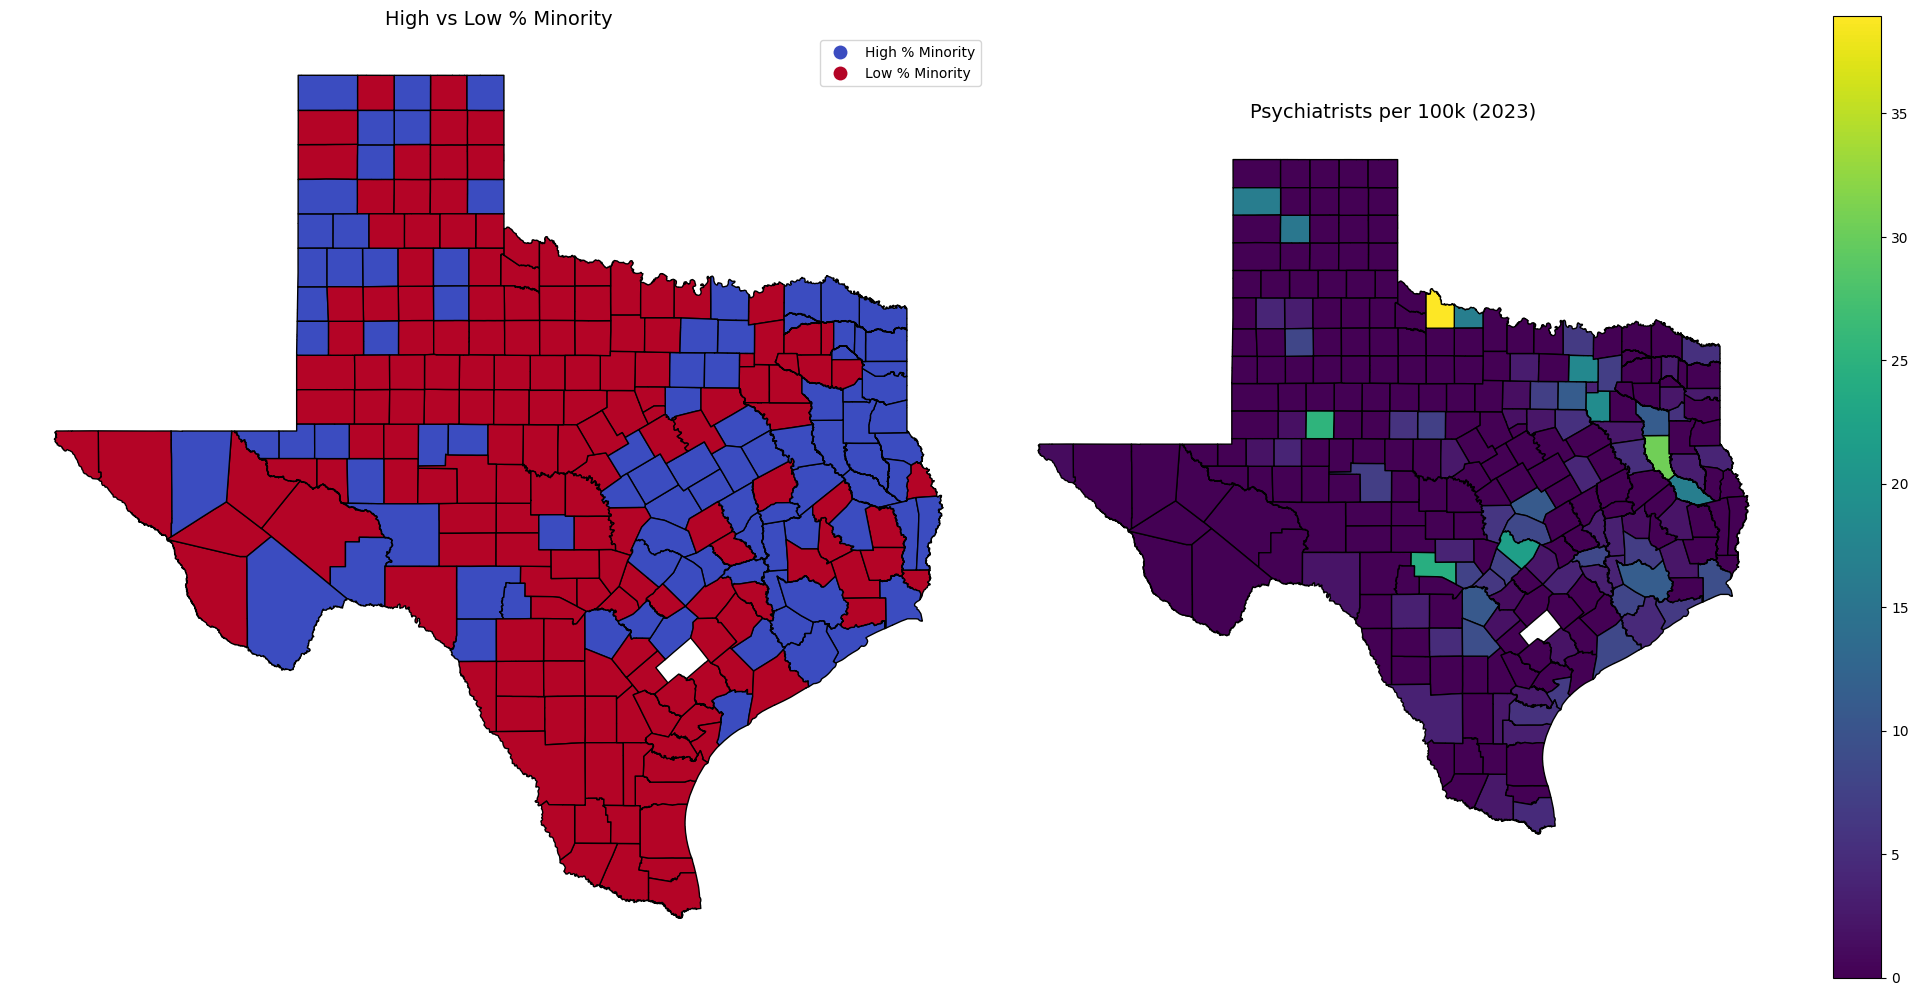

In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load shapefile and filter for Texas
tx_counties = gpd.read_file('/Users/antoantony/Library/CloudStorage/OneDrive-TheUniversityofTexasatAustin/Python/VS_Code/Data Analysis/Disparities Dashboard/texas_shapefile')
tx_counties = tx_counties[tx_counties['STATEFP'] == '48']
    
# Prepare your dataset
therapist_merged['County'] = therapist_merged['County'].str.strip()

# Merge shapefile and your data
tx_map = tx_counties.merge(therapist_merged, left_on='NAME', right_on='County')

# Calculate psychiatrists per 100k population
tx_map['Psychiatrists per 100k (2023)'] = tx_map['Psychiatrist 2023'] / tx_map['2023 Population'] * 100000

# Plot side-by-side maps
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
tx_map.plot(column='High or Low % Minority', ax=axs[0], legend=True, cmap='coolwarm', edgecolor='black')
axs[0].set_title('High vs Low % Minority', fontsize=14)
axs[0].axis('off')
tx_map.plot(column='Psychiatrists per 100k (2023)', ax=axs[1], legend=True, cmap='viridis', edgecolor='black')
axs[1].set_title('Psychiatrists per 100k (2023)', fontsize=14)
axs[1].axis('off')
plt.tight_layout()
plt.show()
